In [1]:
import torch  
import numpy as np 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (15,6)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
#rcParams are runtime configuration settings for matplotlib it is used to customize the default styles of plots

In [54]:
#custom data
def create_data(num_data=30):
    torch.manual_seed(42)
    x = 10* torch.rand(num_data)
    y = x + torch.randn(num_data)*0.3
    return x, y

(0.0, 10.0)

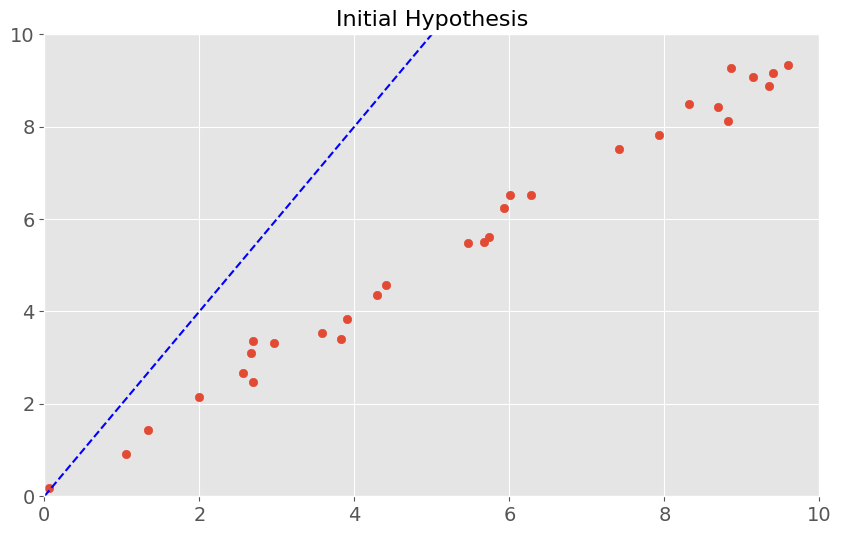

In [4]:
x , y = create_data()
x.shape , y.shape

m0 =2 
xplot = np.array([0.0,10.0])
yplot = m0*xplot
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(x , y)
ax.plot(xplot , yplot , color='blue', linestyle='--')
ax.set_xlim(0,10)
ax.set_title('Initial Hypothesis')

ax.set_ylim(0,10)

### Define Loss Function 

- e= (yi - mxi) --> error
- l = sum(yi-mxi)**2
- mean squared loss = 1/n sum(yi-mxi)**2

In [5]:
#brute force search for best m

max_value = 2.0 
min_value = 0
num_steps = 50 

step_size = (max_value - min_value)/(num_steps-1)
step_size

m = torch.zeros(num_steps)
m

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [6]:
loss = torch.zeros(num_steps)
loss

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

torch.Size([50]) torch.Size([50])
tensor(24) tensor(0.0975)


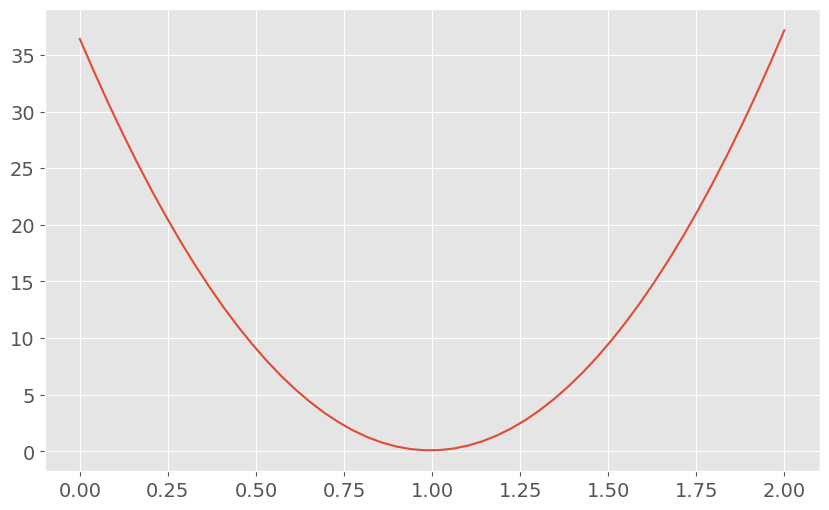

In [7]:
for i in range(num_steps):
    m[i] = min_value + i*step_size
    error = y - m[i]*x
    loss[i] = torch.sum(error**2)/len(x)

print(m.shape , loss.shape)
plt.figure(figsize=(10,6))
plt.plot(m , loss)
m_final = torch.min(loss)
m_final_index = torch.argmin(loss)
print(m_final_index, m_final)


/var/folders/9k/l4fvk2k11n3fy3hpynsp3_1c0000gn/T/ipykernel_20260/3652464086.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  yplot_updated = m[m_final_index]*xplot_updated


Text(0.5, 1.0, 'Final Hypothesis after Brute Force Search')

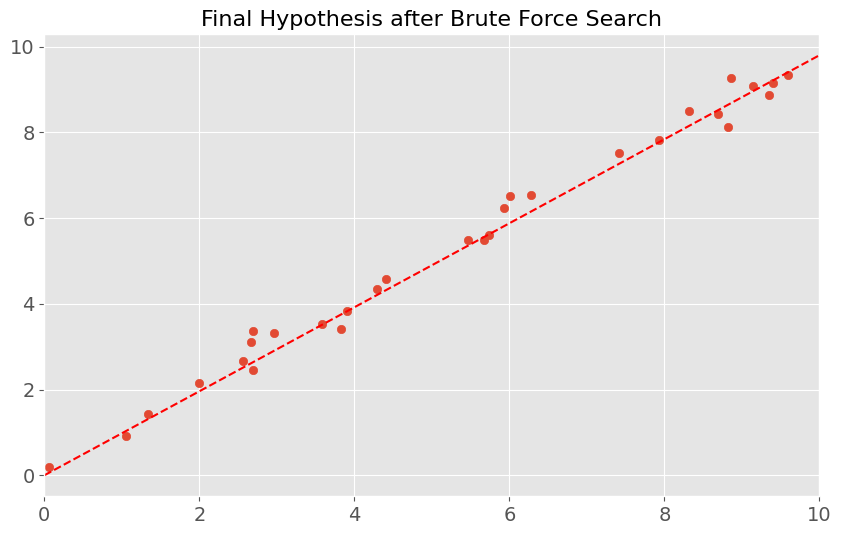

In [8]:
xplot_updated = np.array([0.0,10.0])
yplot_updated = m[m_final_index]*xplot_updated
fig,ax = plt.subplots(figsize=(10,6))
ax.scatter(x , y)
ax.plot(xplot_updated , yplot_updated , color='red', linestyle='--')
ax.set_xlim(0,10)
ax.set_title('Final Hypothesis after Brute Force Search')

In [9]:
#parameter settings 
num_iter0 = 50 
lr0 = 0.005 

#initial guess for m 
m0 = 2.0 
max_loss = 30.0 #for plotting purposes

Best loss is 0.08901379257440567 at m = 0.9947720766067505


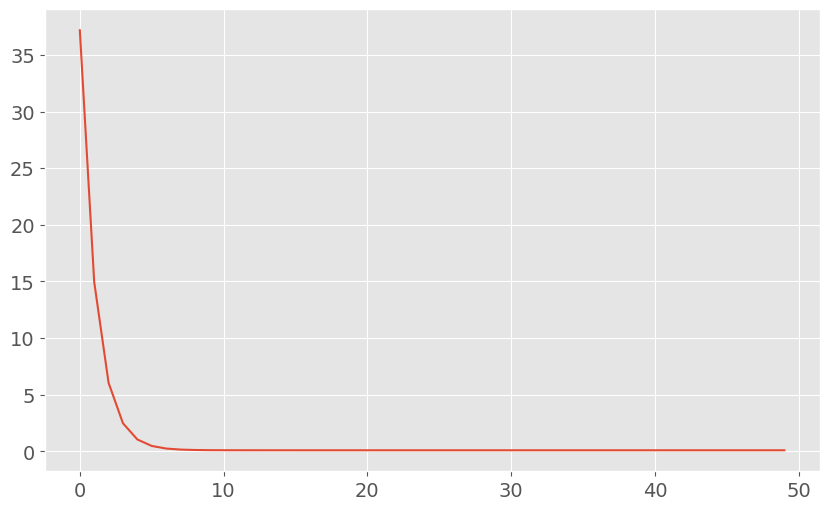

In [10]:
num_iter = num_iter0
lr = lr0
m = m0

#for collection intermediate losses.
loss_gd = torch.zeros(num_iter) #number of losses = number of iterations
slopes = torch.zeros(num_iter) #number of slopes = number of iterations

for i in range(num_iter):
    e = y - m*x
    loss_gd[i] =torch.sum(e**2)/len(x)
    g = -2.0 * torch.sum(x * e) /len(x)
    
    m = m -lr *g
    slopes[i] = m
    
loss_best , index = torch.min(loss_gd,dim=0)
#torch.min(loss_gd,0) returns the minimum value and the index of that minimum value along dimension 0
m_best = slopes[index]
print(f'Best loss is {loss_best} at m = {m_best}')

plt.figure(figsize=(10,6))
plt.plot(loss_gd)


In [11]:
torch.randint(0,len(y),(1,))[0]

tensor(3)

### Stochastic Gradient Descent

tensor(0.1006) tensor(0.9884)


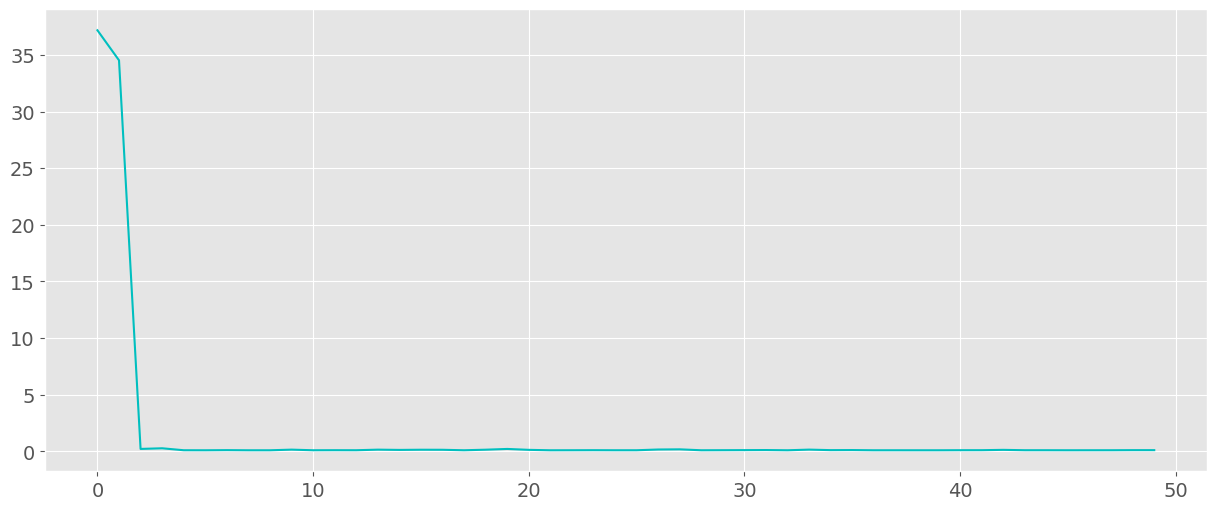

In [25]:
num_iter = num_iter0
lr = lr0
m = m0

loss_gd = torch.zeros(num_iter)

for i in range(0,num_iter):
    #select random data point
    k = torch.randint(0,len(y),(1,))[0]
    #[0] to get the integer value from the tensor
    
    #computer average loss of entire data set 
    e = y - m*x
    loss_gd[i] = torch.sum(e**2)/len(x)
    #compute gradient for one point
    g = -2.0* x[k] * (y[k] - m* x[k])
    m = m -lr*g

m_final = m 
print(loss_gd[-1] , m_final)

plt.figure
plt.plot(loss_gd,'c-')




### Stochastic gradient Descent with mini-batch

tensor(0.9975) tensor(0.1162)
Final loss:       0.2116509
Final parameter:  0.9594866


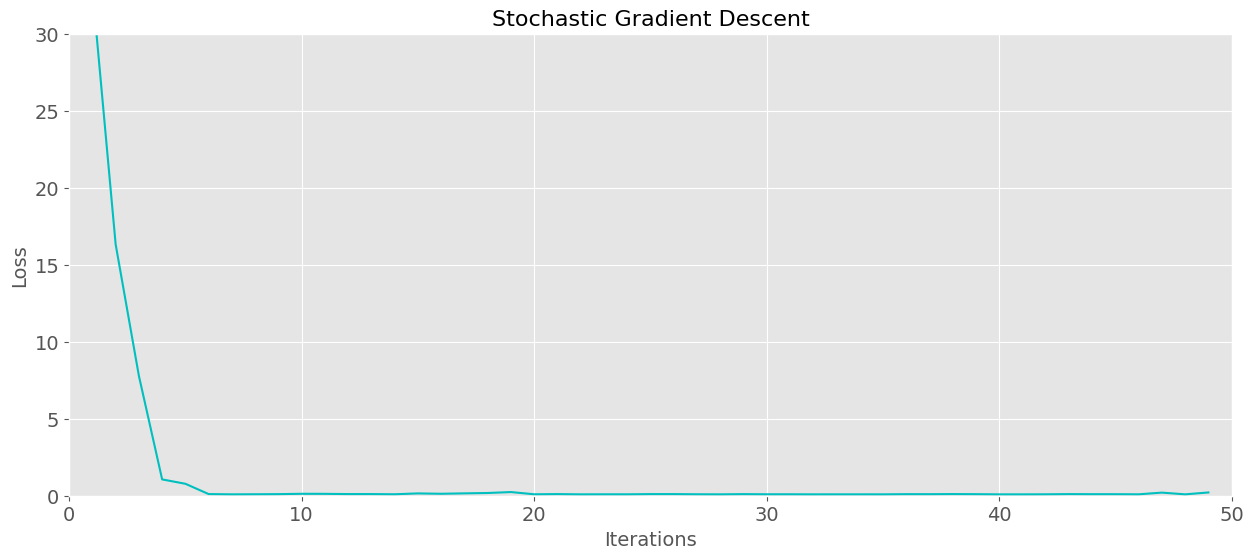

In [28]:
num_iter =num_iter0
lr = lr0
m = m0 

batch_size = 10 

loss_gd_mb = torch.zeros(num_iter)

for i in range(num_iter):
    k_batch = torch.randint(0,len(y),(batch_size,))
    
    e = y[k_batch] - m*x[k_batch]
    loss_gd_mb[i] = torch.sum(e**2) /batch_size
    g = (-2.0/batch_size) * torch.sum(x[k_batch]*(y[k_batch]-m*x[k_batch]))
    m = m-lr*g
    
print(m , loss_gd_mb[-1])

plt.figurenum_iter = num_iter0
lr = lr0
m = m0

# For collecting intermediate losses.
loss_sgd = torch.zeros(num_iter)

for i in range(0, num_iter):
    # Randomly select a training data point
    k = torch.randint(0, len(y), (1,))[0]

    # Compute the avearge loss of the entire dataset.
    e = y - m * x
    loss_sgd[i] = torch.sum(torch.mul(e, e)) / len(x)

    # Calculate gradient using a single data point.
    g = -2.0 * x[k] * (y[k] - m * x[k])

    # Update the parameter 'm'.
    m = m - lr * g

m_final = m.numpy()  # Current parameter value

print("Final loss:      ", loss_sgd[-1].numpy())
print("Final parameter: ", m_final)

# Plot loss vs m
plt.figure
plt.plot(loss_sgd.numpy(), 'c-')
plt.xlim(0, num_iter)
plt.ylim(0, max_loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Stochastic Gradient Descent')
plt.show();

# plot_linear_model(x, y, m_final)
# plt.plot(loss_gd_mb)


### Autograd for automatic differentiation

In [30]:
# autograd example
x = torch.tensor(4.0 , requires_grad=True)

y = x**2 
y.backward()
x.grad

tensor(8.)

In [31]:
w1 = torch.tensor(5.0, requires_grad=True)
w2 = torch.tensor(3.0,  requires_grad=True)

z = 3 * w1**2 + 2 * w1 * w2 

z.backward()

print(w1.grad)
print(w2.grad)


tensor(36.)
tensor(10.)


In [34]:
#example 3 

a = torch.rand((3,5),requires_grad=True)
result = a*5
result

tensor([[4.2387, 0.8555, 2.0512, 2.3699, 2.0629],
        [1.9452, 1.5992, 3.3610, 3.6880, 2.0144],
        [4.4646, 2.4866, 3.1094, 3.1257, 1.6488]], grad_fn=<MulBackward0>)

In [37]:
mean_result = result.sum() 
mean_result.backward()
a.grad

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

### Disbling autograd

1. tensor.detach --> make a copy of the tensor with autograd disabled
2. torch.no_grad() / torch.inference_mode()

In [39]:
a = torch.randn((3,5),requires_grad=True)
a

tensor([[-0.4832, -1.8853, -2.5173,  0.7378,  1.1679],
        [ 0.4075,  2.6472, -0.8250,  0.8045,  0.3559],
        [ 0.0674,  0.8251,  0.5387,  0.9848, -0.8829]], requires_grad=True)

In [40]:
detached_a = a.detach()
detached_result = detached_a*5
result = a*5

mean_result = result.sum()
mean_result.backward()
a.grad


tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

In [41]:
mean_detached_a = detached_result.sum()
mean_detached_a.backward()
detached_a.grad

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

### Gradient descent with Autograd

In [62]:
x , y = create_data()
num_iter = num_iter0
lr = lr0

In [63]:
m = torch.nn.Parameter(torch.tensor(m0,dtype=torch.float32), requires_grad=True)

loss_autograd = torch.zeros(num_iter)
slopes_autograd = torch.zeros(num_iter)

Best loss is 0.08901379257440567 at m = 0.9947720766067505


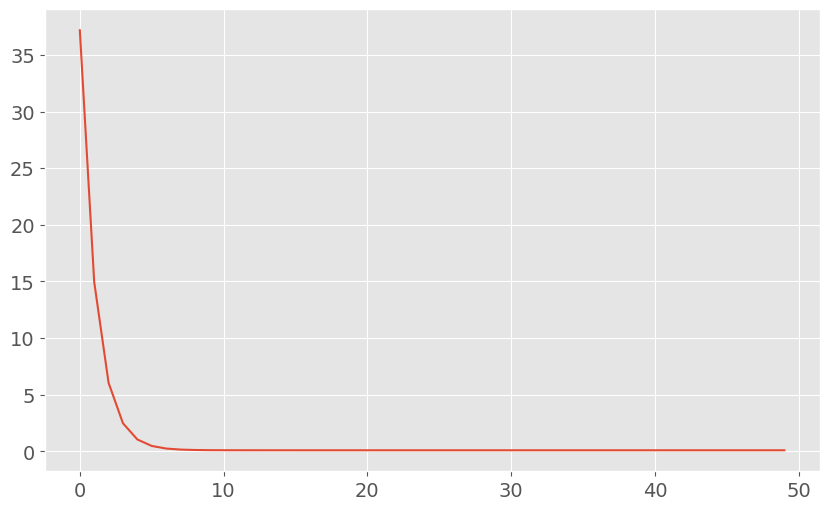

In [64]:
for i in range(num_iter):
    # Compute MSE loss.
    loss = ((y - m * x) ** 2).mean()

    # Automatically compute the gradient of the loss with respect to parameter "m".
    loss.backward()

    # Access the gradient.
    g = m.grad

    with torch.no_grad():
        # Perform in-place updates to tensor (like the tutor's code).
        m -= lr * g

        # Clear gradients so they do not get accumulated
        m.grad = None

    # Track the loss and slope "m" for plotting.
    loss_autograd[i] = loss.detach()  # Create a detached clone of "loss".
    slopes_autograd[i] = m.detach()   # Create a detached clone of "m".

loss_best_autograd , index_autograd = torch.min(loss_autograd,dim=0)
m_best_autograd = slopes_autograd[index_autograd]

print(f'Best loss is {loss_best_autograd} at m = {m_best_autograd}')
plt.figure(figsize=(10,6))
plt.plot(loss_autograd)

In [ ]:
x = np.array([4,3])
y= np.array([3,])
z = np.array([2,7,3])


ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [68]:
np.matmul((x+y),z)

np.int64(38)

In [70]:
x+y

array([7, 6])

In [71]:
y+z

array([ 5, 10,  6])

In [72]:
z+x

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
z = torch.

In [73]:
m = 3 
n = np.zeros((m,m))
n

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
n.flat[0::m+1]=1
n
#flat

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [77]:
a = torch.rand((3, 5), requires_grad=True)

result1 = a * 5

torch.set_grad_enabled(False)

result2 = a * 10

torch.set_grad_enabled(True)

sum_result = result1.sum()

sum_result.backward()
a.grad

tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])

In [78]:
a = torch.rand((3,5))
a

tensor([[0.0758, 0.2247, 0.0624, 0.1816, 0.9998],
        [0.5944, 0.6541, 0.0337, 0.1716, 0.3336],
        [0.5782, 0.0600, 0.2846, 0.2007, 0.5014]])

In [ ]:
# torch.dot(a,a.T) --> this will give error as torch.dot only works for 1D tensors
a.shape , a.T.shape


(torch.Size([3, 5]), torch.Size([5, 3]))

In [82]:
np.dot(a.detach().numpy(),a.detach().numpy().T)

array([[1.0927136 , 0.55878776, 0.61280614],
       [0.55878776, 0.9230307 , 0.59422857],
       [0.61280614, 0.59422857, 0.7105339 ]], dtype=float32)

In [84]:
a[:2,::2]

tensor([[0.0758, 0.0624, 0.9998],
        [0.5944, 0.0337, 0.3336]])

In [85]:
a.detach().numpy()[:2,::2]

array([[0.07580167, 0.06239396, 0.99980444],
       [0.5944375 , 0.03365785, 0.3335721 ]], dtype=float32)

In [86]:
a@a.T

tensor([[1.0927, 0.5588, 0.6128],
        [0.5588, 0.9230, 0.5942],
        [0.6128, 0.5942, 0.7105]])

In [87]:
a+a 

tensor([[0.1516, 0.4493, 0.1248, 0.3633, 1.9996],
        [1.1889, 1.3082, 0.0673, 0.3432, 0.6671],
        [1.1564, 0.1201, 0.5691, 0.4013, 1.0028]])

In [89]:
d=a.detach().numpy()+a.detach().numpy()
d

array([[0.15160334, 0.44933736, 0.12478793, 0.36326194, 1.9996089 ],
       [1.188875  , 1.3081597 , 0.0673157 , 0.3432262 , 0.6671442 ],
       [1.1563711 , 0.12007868, 0.56912696, 0.40133142, 1.0027713 ]],
      dtype=float32)

In [91]:
z=a.detach().numpy().tolist()
z

[[0.07580167055130005,
  0.2246686816215515,
  0.06239396333694458,
  0.1816309690475464,
  0.9998044371604919],
 [0.5944374799728394,
  0.6540798544883728,
  0.033657848834991455,
  0.17161309719085693,
  0.3335720896720886],
 [0.5781855583190918,
  0.06003934144973755,
  0.28456348180770874,
  0.20066571235656738,
  0.5013856291770935]]

In [92]:
e = a+a
len(a)

3

In [94]:
e=a+a

d=a.detach().numpy()+a.detach().numpy()

z=a.detach().numpy().tolist()

c=z+z

z=list(a.detach().numpy())

b=z+z

len(e), len(d), len(c),len(b)

(3, 3, 6, 6)

In [95]:
z=list(a.detach().numpy())
z

[array([0.07580167, 0.22466868, 0.06239396, 0.18163097, 0.99980444],
       dtype=float32),
 array([0.5944375 , 0.65407985, 0.03365785, 0.1716131 , 0.3335721 ],
       dtype=float32),
 array([0.57818556, 0.06003934, 0.28456348, 0.20066571, 0.5013856 ],
       dtype=float32)]

In [96]:
len(z)

3